# Daily Website Visitors

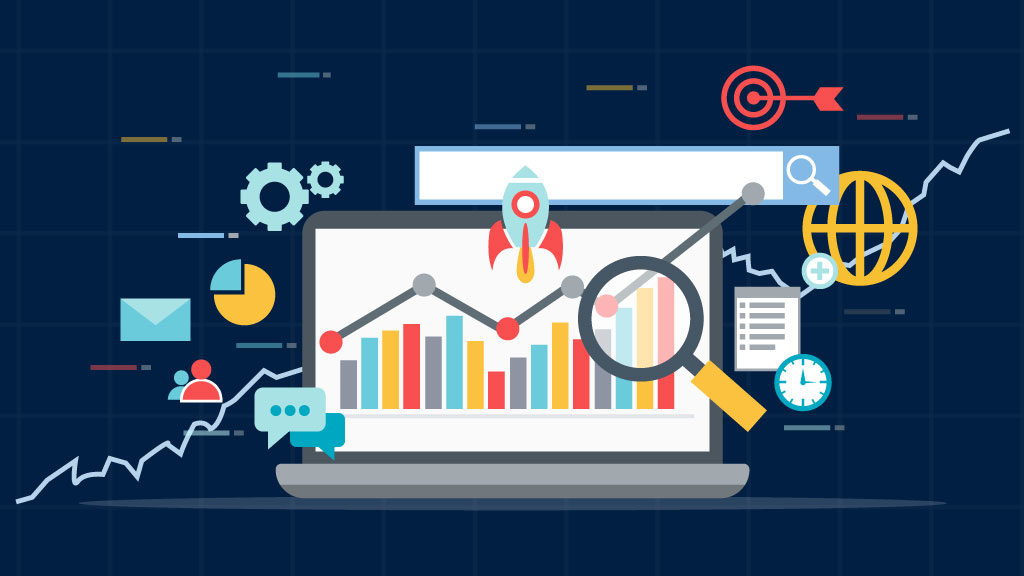

- **Dataset Source**
    - https://www.kaggle.com/bobnau/daily-website-visitors


- **Context of Dataset**
    - This file contains 5 years of daily time series data for several measures of traffic on a statistical forecasting teaching notes website whose alias is statforecasting.com. 
    
    
- **Background Information**
    - There are 2,167 rows of data spanning the date range from September 14, 2014 to August 19, 2020.
    - A visit is defined as a stream of hits on one or more pages on the site on a given day by the same user, as identified by IP address. 
    - Multiple individuals with a shared IP address (e.g., in a computer lab) are considered as a single user, so real users may be undercounted to some extent.
    - The data was collected through a traffic monitoring service known as StatCounter.    
    

- **Attribute Information**
    - Row: Number of rows starting from 0
    - Day: Day of the week (Monday through Sunday)
    - Day.Of.Week: Numeric form of Day (Sunday = 1, Monday = 2, ... , Friday = 6, Saturday = 7)
    - Date: Date of website visits
    - Page.Loads: Number of webpages loaded for visit
    - Unique.Visits: A visit is classified as "unique" if a hit from the same IP address has not come within the last 6 hours. The count of unique visitors is the sum of the counts of returning and first-time visitors by definition.
    - First.Time.Visits: Number of visitors that are not identified by cookies
    - Returning.Visits: Returning visitors are identified by cookies if those are accepted.
    
 
- **Content**
    - [Preparing Dataset](#Preparing-the-data) 
        - Importing Dataset
        - Preprocessing
        
    - [Analyzing Data](#Analyzing-the-data)
        - [1) Summaries of Categorical and Numeric Data](#Summaries)
        - [2) Pair Plot of Daily Website Visit](#Pairplot)
        - [3-1) Plot by Period - Daily Totals](#Daily-Totals)
        - [3-2) Plot by Period - Monthly Totals](#Monthly-Totals)
        - [3-3) Plot by Period - Yearly Totals](#Yearly-Totals)
        - [3-4) Plot by Period - Weekdays](#Weekdays)
        - [4) Decomposition into Trend and Seasonality](#Decomposition)
        - [5) Forecasting with Facebook Prophet](#Prophet)

## <a id='Preparing the data'></a> Preparing Dataset
- Importing Dataset
- Preprocessing

In [1]:
#Import base libraries for time series and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

plt.rcParams['figure.figsize'] = (18,5)     # Set the figure size large enough to accommodate 5 years time series

In [2]:
data = pd.read_csv("https://www.dropbox.com/s/m3aumx4jvz0mih2/daily-website-visitors.csv?dl=1")

In [3]:
data.head()     # First glance at the dataset. "Row" and "Day.Of.Week" columns are not needed, so it'll be dropped.

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [4]:
data = data.drop(columns = ['Row', 'Day.Of.Week'])
data.head()     # Second, the visit values do not seem to be numeric as they contain comma. 
                # Data types need to be checked.

,Day,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Sunday,9/14/2014,"2,146","1,582","1,430",152
1,Monday,9/15/2014,"3,621","2,528","2,297",231
2,Tuesday,9/16/2014,"3,698","2,630","2,352",278
3,Wednesday,9/17/2014,"3,667","2,614","2,327",287
4,Thursday,9/18/2014,"3,316","2,366","2,130",236


In [5]:
data.dtypes     # As expected, the attributes are not in approrpate forms except "Day".
                # Each of them will be converted into appropriate forms as below.

Day                  object
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object

In [6]:
data["Date"] = pd.to_datetime(data.Date)
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)
data['Unique.Visits'] = data['Unique.Visits'].str.replace(',', '').astype(int)
data['First.Time.Visits'] = data['First.Time.Visits'].str.replace(',', '').astype(int)
data['Returning.Visits'] = data['Returning.Visits'].str.replace(',', '').astype(int)
data.dtypes      # Every attribute is now in a good shape. 
                 # Next, we'll see if there's any null value

Day                          object
Date                 datetime64[ns]
Page.Loads                    int64
Unique.Visits                 int64
First.Time.Visits             int64
Returning.Visits              int64
dtype: object

In [7]:
data.isnull().any()     # Fortunately, there's no null value in the dataset. 
                        # We'll proceed to summaries of categorical and numeric data

Day                  False
Date                 False
Page.Loads           False
Unique.Visits        False
First.Time.Visits    False
Returning.Visits     False
dtype: bool

## <a id='Analyzing the data'></a>Analyzing Data

### <a id='Summaries'></a> 1) Summaries of Categorical and Numeric Data

In [8]:
data.Day.value_counts()     # For the summary of categorical data, each day is quite fairly presented in the "Day" 
                            # attribute.

Wednesday    310
Monday       310
Tuesday      310
Sunday       310
Saturday     309
Thursday     309
Friday       309
Name: Day, dtype: int64

In [9]:
data.describe()     # This summary is visualized below for better understanding

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000
mean,4116.989386,2943.646516,2431.824181,511.822335
std,1350.977843,977.886472,828.704688,168.736370
min,1002.000000,667.000000,522.000000,133.000000
25%,3114.500000,2226.000000,1830.000000,388.500000
50%,4106.000000,2914.000000,2400.000000,509.000000
75%,5020.500000,3667.500000,3038.000000,626.500000
max,7984.000000,5541.000000,4616.000000,1036.000000


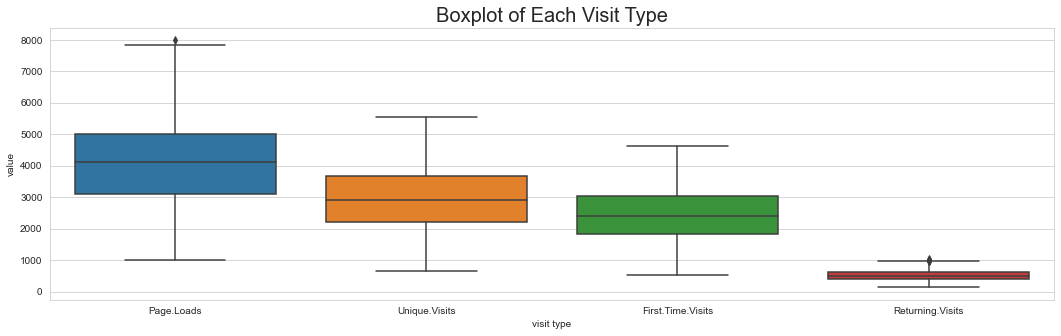

In [10]:
sns.set_style("whitegrid")

visit_type = pd.melt(data, id_vars = ["Date"], var_name = 'visit type', 
                     value_vars = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits'])

ax = sns.boxplot(x = 'visit type', y = 'value', data = visit_type)
ax.set_title("Boxplot of Each Visit Type", fontsize = 20);

# We can see that among the unique visits, the number of first time visits is much higher than that of returning 
# visits.

### <a id='Pairplot'></a> 2) Pair Plot of Daily Website Visit

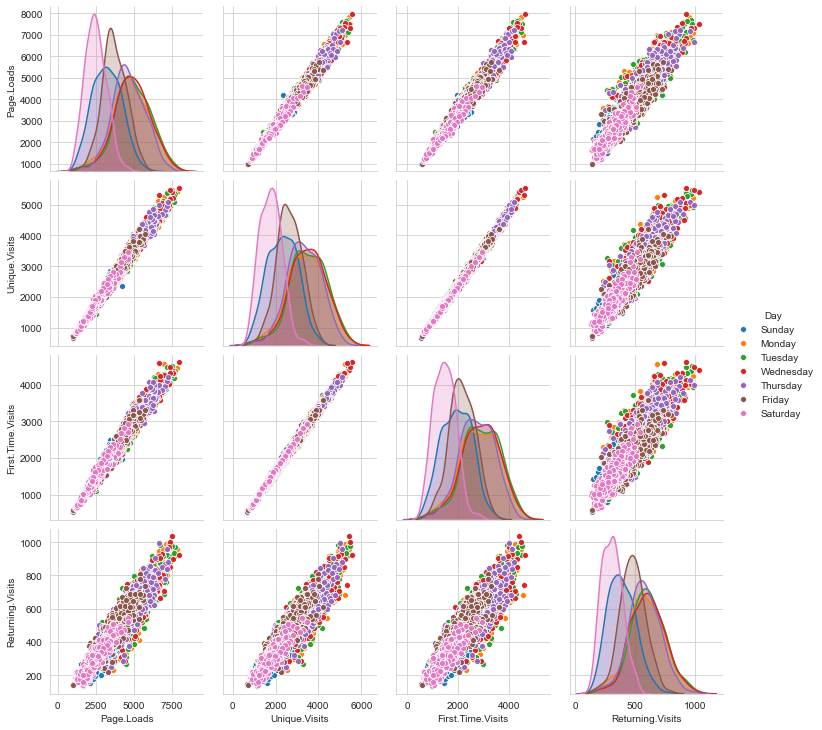

In [11]:
# Next, we'll see how the attributes are related to each other. The pair plot gives an idea of the relationships
# amongst the attributes

sns.pairplot(data, hue = "Day", vars = ["Page.Loads", "Unique.Visits", "First.Time.Visits", "Returning.Visits"]);

# At first glance, weekdays (Monday through Thursday) tend to have more visitors than Friday or weekends.
# We can assume that the users usually visit the website during the weekdays as it's an academic website 

### <a id='Daily-Totals'></a> 3-1) Plot by Period - Daily Totals

In [12]:
# In order to explore the data in more detail, more plots will be presented by period to see if there's any certain
# pattern. The first plot is the daily one as the original dataset contains the daily traffic

data = data.set_index("Date")     # For the future convenience, "Date" is set as an index here.
data.head()                       # The new look of the dataset

,Day,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,
2014-09-14,Sunday,2146,1582,1430,152
2014-09-15,Monday,3621,2528,2297,231
2014-09-16,Tuesday,3698,2630,2352,278
2014-09-17,Wednesday,3667,2614,2327,287
2014-09-18,Thursday,3316,2366,2130,236


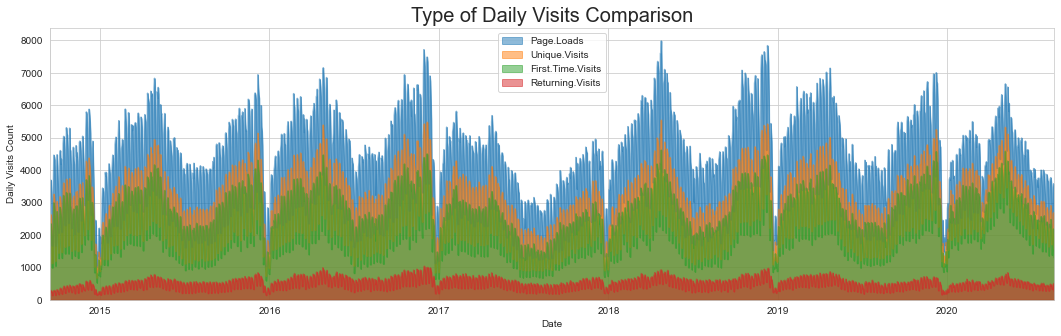

In [13]:
data[data.columns[1:]].plot.area(stacked = False)            
plt.title("Type of Daily Visits Comparison", fontsize = 20)   
plt.ylabel("Daily Visits Count");                    

# The numbers of page loads and visits consistently decrease at the end, beginning and middle of the year, while they 
# increase for the rest of the year. This is a typical pattern for the academic calendar with summer and winter break.

### <a id='Monthly-Totals'></a> 3-2) Plot by Period - Monthly Totals

In [14]:
# Next, monthly data is plotted to verify the pattern thas is assumed above.

monthly = data.resample('M').sum() 
monthly

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-09-30,56052,39544,35542,4002
2014-10-31,121983,85569,75536,10033
2014-11-30,114190,81513,70591,10922
2014-12-31,105617,76005,64677,11328
2015-01-31,96077,66863,57010,9853
...,...,...,...,...
2020-04-30,151442,117480,100478,17002
2020-05-31,156021,121017,102424,18593
2020-06-30,124683,95716,80704,15012


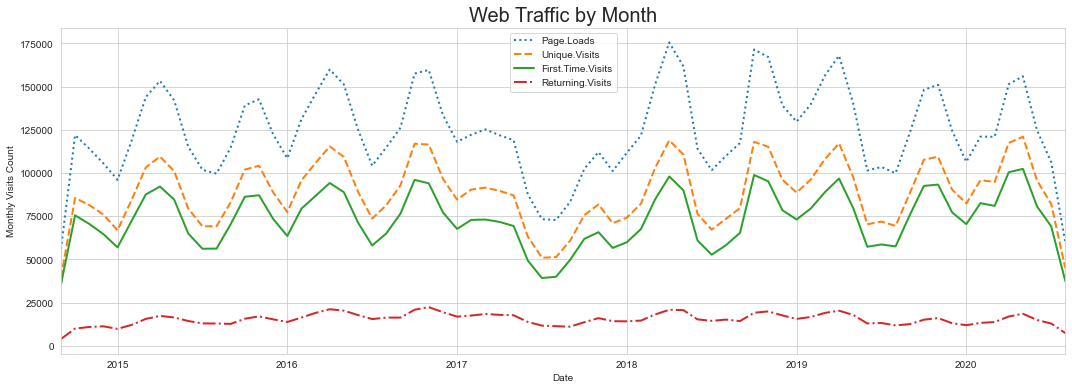

In [15]:
fig, ax = plt.subplots(figsize=(18,6))                     
                                                          
monthly.plot(style=[':', '--', '-', '-.'], ax=ax, lw=2)
plt.ylabel('Monthly Visits Count')
plt.title("Web Traffic by Month", fontsize = 20);

# The monthly plot gives a clear 'M' pattern in each year representing low volumes in the winter and summer break

### <a id='Yearly-Totals'></a> 3-3) Plot by Period - Yearly Totals

In [16]:
yearly = data.resample('Y').sum()      
yearly                                

# The yearly plot describes the holisitc volume by year showing the traffic pattern in a more broad perspective

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-12-31,397842,282631,246346,36285
2015-12-31,1490153,1061558,888896,172662
2016-12-31,1618279,1171300,951478,219822
2017-12-31,1239604,898628,717795,180833
2018-12-31,1642681,1115124,910379,204745
2019-12-31,1586064,1115379,930623,184756
2020-12-31,946893,734262,624246,110016


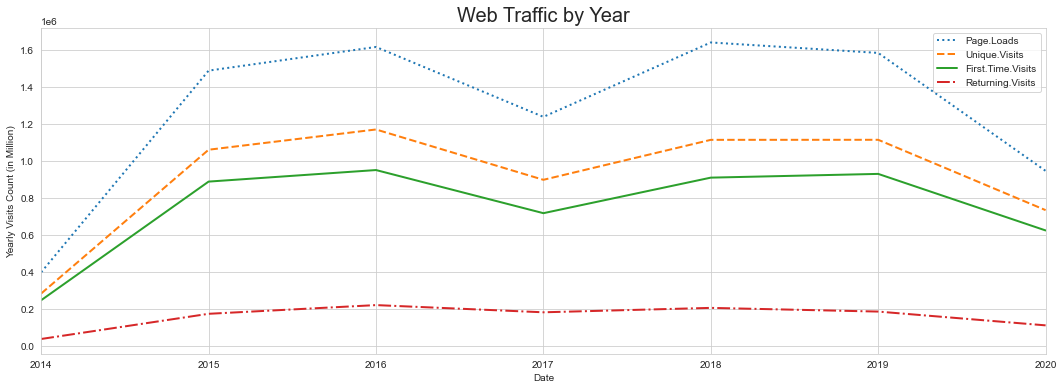

In [17]:
fig, ax = plt.subplots(figsize=(18,6))                     
                                                             
yearly.plot(style=[':', '--', '-', '-.'], ax=ax, lw=2)     
plt.ylabel('Yearly Visits Count (in Million)')              
plt.title("Web Traffic by Year", fontsize = 20);           

# The website traffic begins increasing from 2014, but goes down in 2017, jumps back up again in the following year to
# where the volumes used to be, and lastly ended up with the descending pattern. As a reminder, the data range is up
# to August 2020, which is the typical summer break time.

### <a id='Weekdays'></a> 3-4) Plot by Period - Weekdays

In [18]:
# As we previously assumed with the pair plot, it's worth to plot by day to check if the weekdays have different amount 
# of traffic. 

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = [calendar.day_name[index] for index in by_weekday.index]     #Convert numbers into day names
by_weekday

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Monday,4845.680645,3458.425806,2858.180645,600.245161
Tuesday,4955.335484,3539.293548,2928.232258,611.061290
Wednesday,4893.916129,3502.012903,2895.490323,606.522581
Thursday,4651.355987,3327.553398,2747.317152,580.236246
Friday,3719.860841,2646.770227,2164.417476,482.352751
Saturday,2501.025890,1786.747573,1477.181230,309.566343
Sunday,3246.980645,2341.270968,1949.025806,392.245161


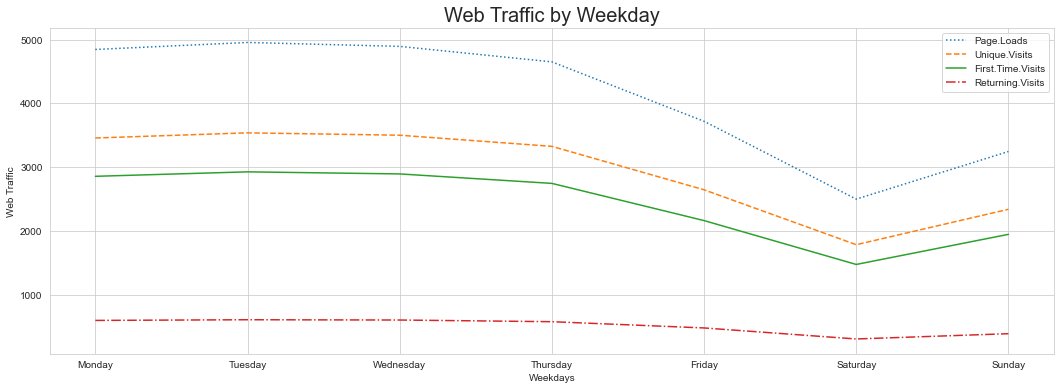

In [19]:
fig, ax = plt.subplots(figsize=(18,6))                     # The traffic by weekday clearly shows that the users tend
                                                           # to visit the website from Monday to Thursday. Notice that  
by_weekday.plot(style=[':', '--', '-', '-.'], ax=ax)       # Saturday has the least traffic.
plt.title("Web Traffic by Weekday", fontsize = 20)
plt.xlabel("Weekdays")
plt.ylabel("Web Traffic");      

### <a id='Decomposition'></a> 4) Decomposition into Trend and Seasonality

In [20]:
# From the plots above, we noticed there are periodic fluctuations each year. In this stage, we'll decompse data into 
# trend (consistent upwards or downwards slope of a time series), seasonal (clear periodic pattern of a time series), 
# residual (what is left over after fitting the model) and observed values. Since the changes over time are 
# consistently made by the similar amount, the additive model is more suitable than the multiplicative model for 
# decomposition.

from statsmodels.tsa.seasonal import seasonal_decompose

# Here I selected "Unique.Visits" since it represents both "First.Time.Visits" and "Returning.Visits".
decomposition = seasonal_decompose(data['Unique.Visits'], period=12, model='additive')

df_decomposed = pd.DataFrame({'trend': decomposition.trend, 'seasonal' : decomposition.seasonal, 
                              'residual' : decomposition.resid, 'observed' : decomposition.observed})
df_decomposed.dropna()

,trend,seasonal,residual,observed
Date,,,,
2014-09-20,2394.791667,-28.606499,-1248.185167,1118.0
2014-09-21,2366.416667,-0.610666,-709.806001,1656.0
2014-09-22,2275.916667,-1.982425,312.065759,2586.0
2014-09-23,2252.375000,-17.582657,1022.207657,3257.0
2014-09-24,2290.916667,-12.078722,896.162055,3175.0
...,...,...,...,...
2020-08-09,2492.583333,-1.982425,-549.600908,1941.0
2020-08-10,2412.333333,-17.582657,350.249324,2745.0
2020-08-11,2373.000000,-12.078722,381.078722,2742.0


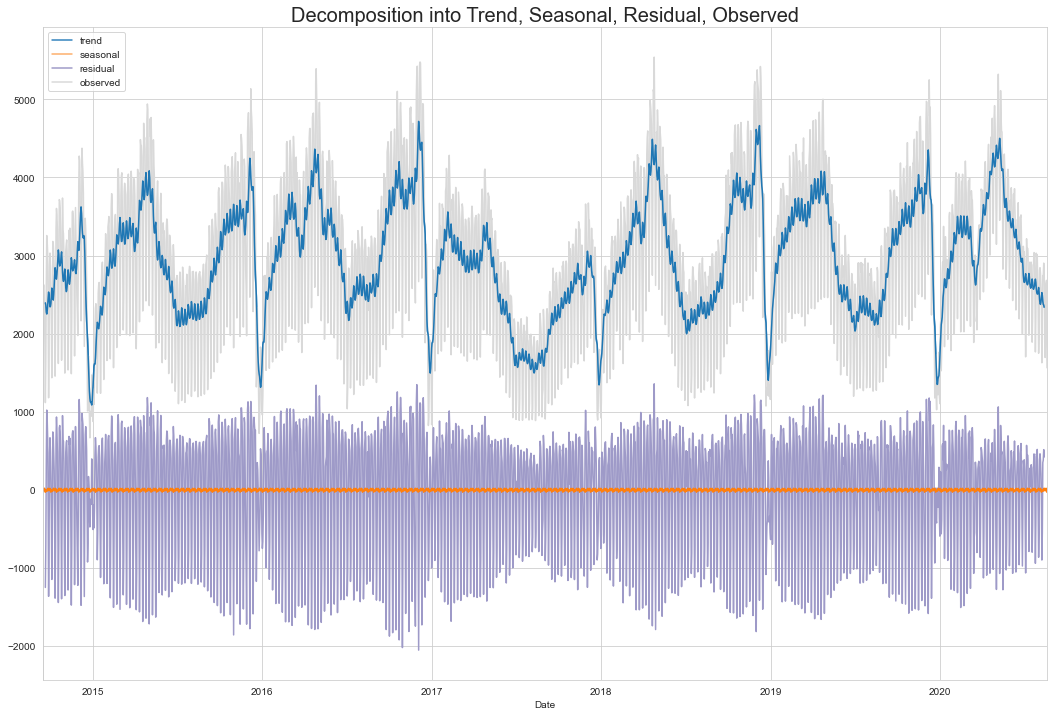

In [21]:
fig, ax = plt.subplots(figsize=(18,12))

df_decomposed.plot(ax=ax, label="trend", cmap='tab20c')
plt.legend(loc='upper left')
plt.title("Decomposition into Trend, Seasonal, Residual, Observed", fontsize = 20);

df_decomposed['trend'].plot();     # To make the graphs more readable, here I inserted these codes emphasizing the 
df_decomposed['seasonal'].plot();  # colors of trend and seasonal lines.

# With this graph, we can see the trend line along with the observed data points and the seasonal line with residual.

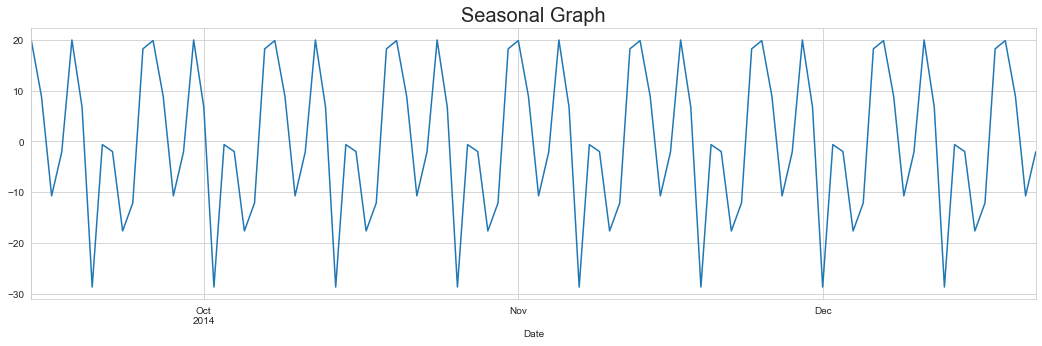

In [22]:
df_decomposed['seasonal'][0:100].plot()      
plt.title("Seasonal Graph", fontsize = 20); 

# Since it's hard to see the seasonal graph above, it is separately plotted here with a closer look to make it more
# readable.

### <a id='Prophet'></a> 5) Forecasting with Facebook Prophet

In [23]:
# So far, we've identified certain patterns for this dataset. With Facebook Prophet, we'll perform predictive analysis
# forecasting the future traffic.

from fbprophet import Prophet

# Once again, "Unique.Visits" is selected for the forecast.
proph_df = data.reset_index()[["Date", "Unique.Visits"]].rename(columns = {"Date":"ds", "Unique.Visits":"y"})
proph_df.tail()

Importing plotly failed. Interactive plots will not work.


,ds,y
2162,2020-08-15,1696
2163,2020-08-16,2037
2164,2020-08-17,2638
2165,2020-08-18,2683
2166,2020-08-19,1564


In [24]:
# Yearly, weekly and daily seasonality are included in the model. Note that the width of interval is changed from 
# default of 80% to 95%.

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, interval_width = 0.95)
model.fit(proph_df);

In [25]:
future_df = model.make_future_dataframe(periods=365)     
future_df.tail()                                         
                                                           
# The dataframe is set for 1 year prediction. Notice the date here is August 2021, a year from the last date of the 
# dataset.

,ds
2527,2021-08-15
2528,2021-08-16
2529,2021-08-17
2530,2021-08-18
2531,2021-08-19


In [26]:
forecast = model.predict(future_df) 
forecast.tail()                        

# The predicted values are stored in the dataframe.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2527,2021-08-15,2978.014896,1019.304232,3376.481762,1959.433463,4019.547866,-761.940059,-761.940059,-761.940059,587.171114,...,-600.569926,-600.569926,-600.569926,-748.541248,-748.541248,-748.541248,0.0,0.0,0.0,2216.074837
2528,2021-08-16,2978.763276,2206.725398,4474.056987,1955.728360,4024.147601,358.653179,358.653179,358.653179,587.171114,...,516.302135,516.302135,516.302135,-744.820071,-744.820071,-744.820071,0.0,0.0,0.0,3337.416455
2529,2021-08-17,2979.511656,2204.541119,4565.775912,1952.040721,4028.747337,442.888396,442.888396,442.888396,587.171114,...,596.903494,596.903494,596.903494,-741.186212,-741.186212,-741.186212,0.0,0.0,0.0,3422.400052
2530,2021-08-18,2980.260036,2261.161841,4630.765010,1948.415975,4033.347073,408.837832,408.837832,408.837832,587.171114,...,559.360943,559.360943,559.360943,-737.694225,-737.694225,-737.694225,0.0,0.0,0.0,3389.097867
2531,2021-08-19,2981.008416,2008.823815,4447.519810,1945.194489,4037.946809,236.231466,236.231466,236.231466,587.171114,...,383.421355,383.421355,383.421355,-734.361003,-734.361003,-734.361003,0.0,0.0,0.0,3217.239882


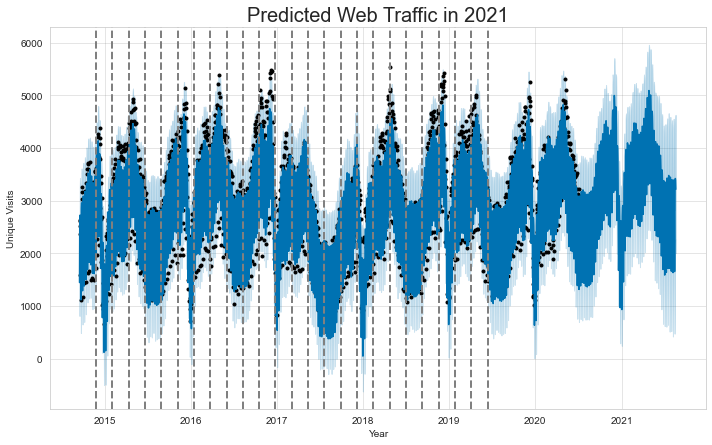

In [27]:
fig1 = model.plot(forecast)

for cp in model.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

plt.title("Predicted Web Traffic in 2021", fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Unique Visits');
    
# The change points are indicated with the grey dotted lines. The model suggests that after the last date of 
# the dataset (Aug 2020), the traffic will increase again until the end of year holiday season. Although the traffic 
# is anticipated to decrease during the holiday season, it'll jump back up as the academic calendar will begin again

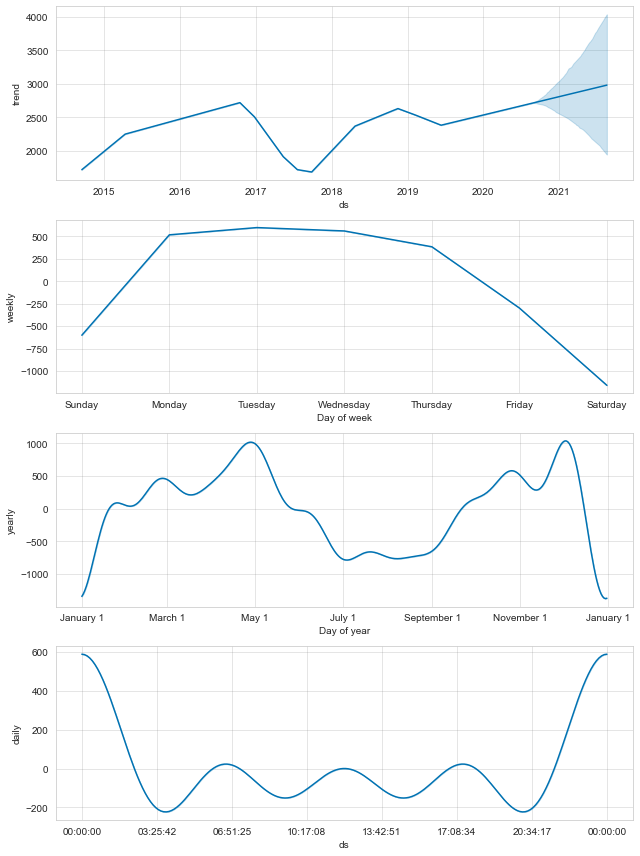

In [28]:
fig2 = model.plot_components(forecast);

# The graph of each component is plotted. We can recognize the patterns that we discussed so far here.